In [1]:
shape_cat="mcal"
vol="vlim"
z_range="all_z"


lambda_range=0
with_r=True

In [2]:
from astropy.io import fits
from astropy.table import Table
import pandas as pd
import fitsio as fio
import numpy as np
import ast

import astropy.cosmology
from astropy.coordinates import SkyCoord  # High-level coordinates
from astropy.coordinates import ICRS, Galactic, FK4, FK5  # Low-level frames
from astropy.coordinates import Angle, Latitude, Longitude  # Angles
import astropy.units as u
from IPython.display import display, Math
from tqdm.notebook import tqdm
tqdm.pandas()

/home/cz136/anaconda3/envs/balrog/lib/python3.7/site-packages/tqdm/std.py:648: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [3]:
#This header file contains all the common packages
%matplotlib inline
%run -i /home/cz136/project/sa/lib/src/header.py $shape_cat $vol $z_range 
%run -i /home/cz136/project/sa/lib/src/func.py  
%run -i /home/cz136/project/sa/lib/src/corr_func.py

members= pd.read_pickle("/home/cz136/project/sa/data/BPZ.pkl") #load BPZ catalog
red_members=pd.read_pickle("/home/cz136/project/sa/data/shape_BPZ.pkl")
red_members_index=red_members.index
red_members=None

In [4]:
NBINS=10

z_bins=np.arange(0.2,0.67,0.15)
lambda_bins=np.append(np.arange(20,66,15),1000)

print(z_bins)
print(lambda_bins)

[0.2  0.35 0.5  0.65]
[  20   35   50   65 1000]


In [5]:
woRedMask=~np.isin(members.index,red_members_index)

In [6]:
## lambda x z = 4x3
import gc

def get_ng_values(clusters,members,z_bins_low,z_bins_high,lambda_bins_low,lambda_bins_high):
    ng=get_ng_source(clusters,members,z_bins_low,z_bins_high,lambda_bins_low,lambda_bins_high)
    ng_values=np.copy(np.array([ng.meanlogr,ng.xi,ng.varxi]))
    
    del ng
    
    return(ng_values)
    

def get_ng_matrix():
    ng_matrix=[[None for i in range(4)] for j in range(3)]

    for i in trange(3):
        for j in trange(4):
            ng_values=get_ng_values(clusters,members,z_bins[i],z_bins[i+1],lambda_bins[j],lambda_bins[j+1])
            ng_matrix[i][j]=ng_values
            gc.collect()
        
    return(ng_matrix)

In [7]:
ng_matrix=get_ng_matrix()

/home/cz136/project/sa/lib/src/corr_func.py:171: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  centers=members.loc[center_id]


In [8]:
## lambda x z = 4x3
ng_wr_matrix=[[None for i in range(4)] for j in range(3)]

for i in trange(4):
    for j in trange(3):
        ng=get_ng_source(clusters,members,z_bins[j],z_bins[j+1],lambda_bins[i],lambda_bins[i+1],woRed=True)
        ng_values=np.copy(np.array([ng.meanlogr,ng.xi,ng.varxi]))
        ng_wr_matrix[j][i]=ng_values

/home/cz136/project/sa/lib/src/corr_func.py:171: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  centers=members.loc[center_id]


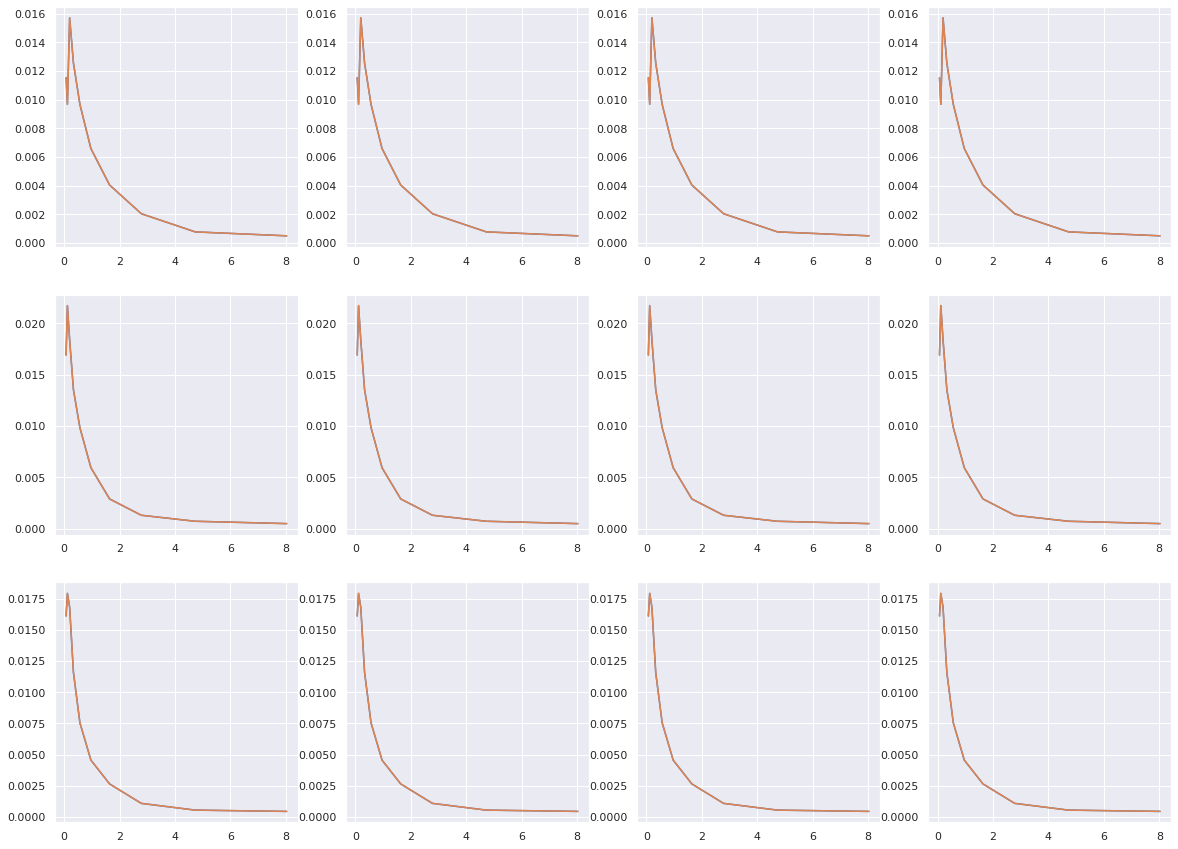

In [14]:
fig, axs = plt.subplots(3, 4,figsize=(20,15))
for i in range(3):
    for j in range(4):
        values=ng_matrix[i][j]
        values_wr=ng_wr_matrix[i][j]
        axs[i,j].plot(np.exp(values[0]),values[1])
        axs[i,j].plot(np.exp(values_wr[0]),values_wr[1])

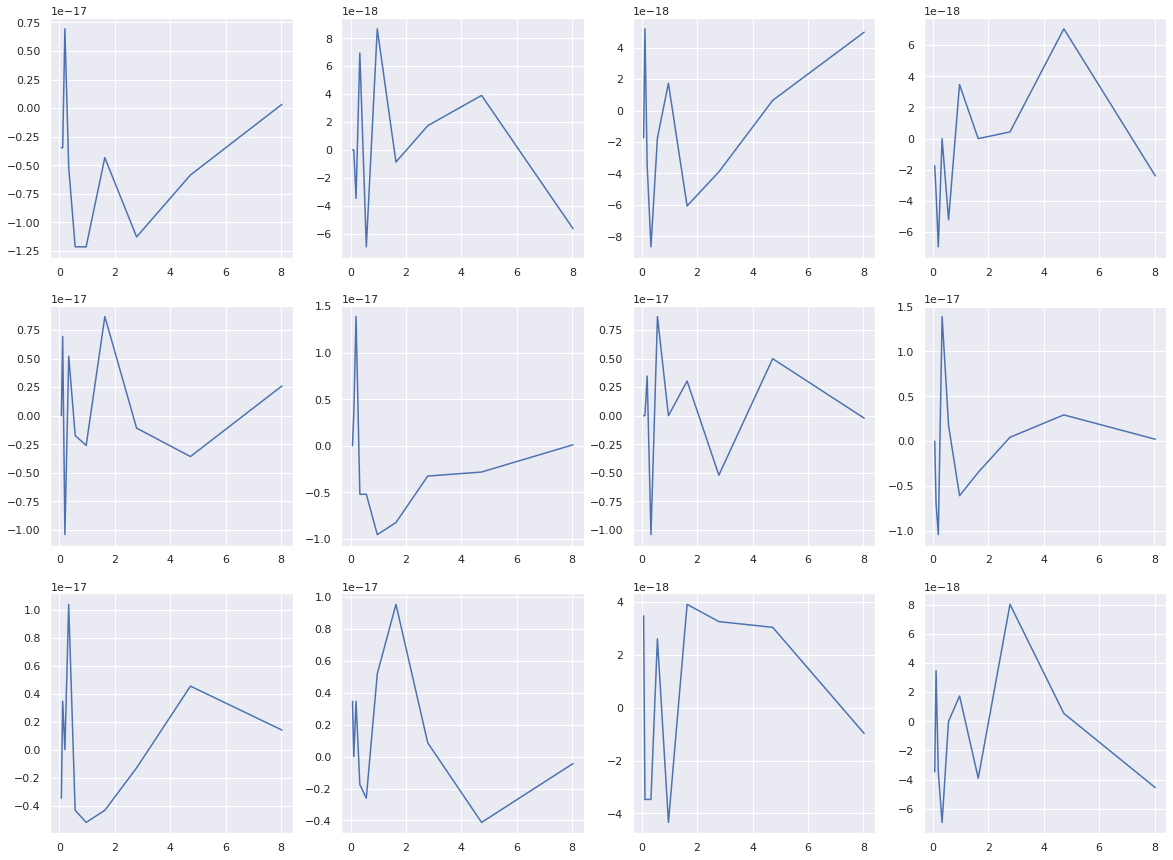

In [15]:
fig, axs = plt.subplots(3, 4,figsize=(20,15))
for i in range(3):
    for j in range(4):
        values=ng_matrix[i][j]
        values_wr=ng_wr_matrix[i][j]
        axs[i,j].plot(np.exp(values[0]),values[1]-values_wr[1])